In [17]:
import tensorflow as tf

In [18]:
directory= 'C:\\Users\\Harikishan\\Downloads\\data\\train'

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import os
import pandas as pd

In [20]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1924 files belonging to 2 classes.


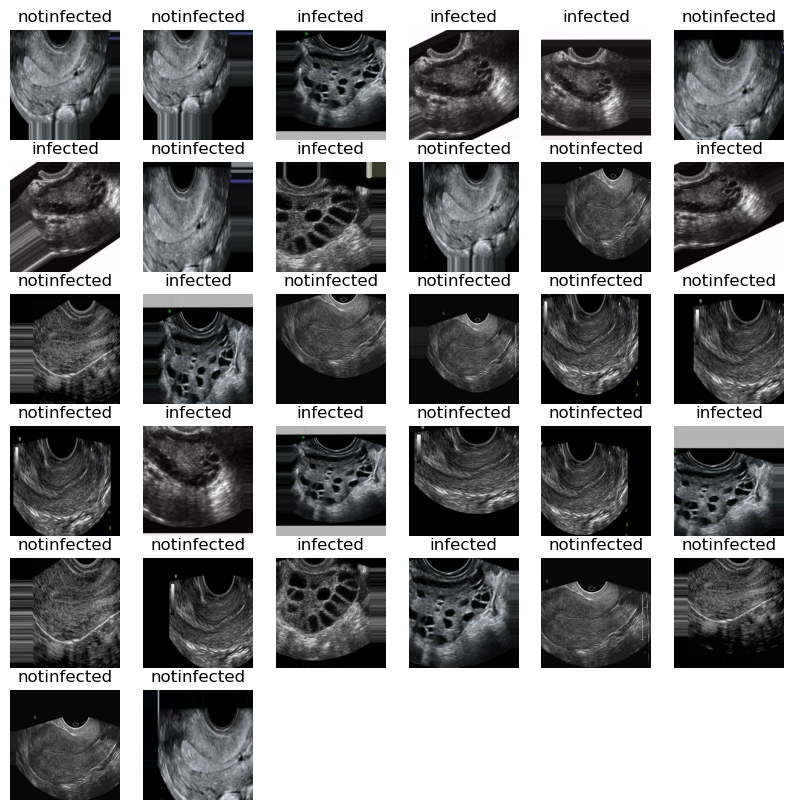

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=30,
                             validation_split=0.3,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='training',
                                       seed=24)
# prepare an iterators for each dataset
val_it = datagen.flow_from_directory( directory, 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='validation',
                                       seed=24)

Found 1348 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [23]:
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchy.shape, batchy.min(), batchy.max()))
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(100, 2), min=0.000, max=1.000
Batch shape=(100, 224, 224, 3), min=0.000, max=1.000


In [24]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

## Model 1

In [25]:
model1 = Sequential()
model1.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=(4,4)))
# REPEAT CONV AND POOLING layer 3 TIMES
model1.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(4,4)))
#model1.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# model1.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# model1.add(MaxPooling2D(pool_size=(4,4)))
model1.add(Flatten())
#model1.add(Dense(128,activation='relu'))
#model1.add(Dense(64,activation='relu'))
model1.add(Dense(2,activation='softmax'))

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 10)      760       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 10)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 51, 51, 12)        3012      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 12)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1728)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [27]:
from tensorflow.keras.losses import CategoricalCrossentropy
model1.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [28]:
history = model1.fit( 
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5
14/14 [==============================] - 35s 3s/step - loss: 0.6577 - accuracy: 0.6068 - val_loss: 0.5879 - val_accuracy: 0.7760
Epoch 2/5
14/14 [==============================] - 34s 2s/step - loss: 0.4553 - accuracy: 0.8546 - val_loss: 0.3179 - val_accuracy: 0.8767
Epoch 3/5
14/14 [==============================] - 32s 2s/step - loss: 0.2569 - accuracy: 0.8976 - val_loss: 0.2051 - val_accuracy: 0.9167
Epoch 4/5
14/14 [==============================] - 32s 2s/step - loss: 0.1523 - accuracy: 0.9407 - val_loss: 0.1256 - val_accuracy: 0.9479
Epoch 5/5
14/14 [==============================] - 36s 3s/step - loss: 0.0998 - accuracy: 0.9659 - val_loss: 0.0808 - val_accuracy: 0.9722


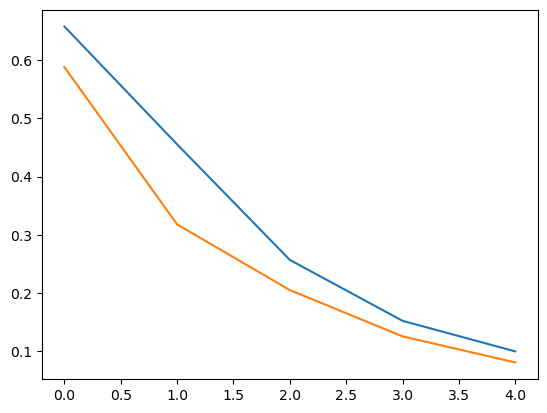

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Model 2

In [30]:
model2 = Sequential()
model2.add(Conv2D(12, (6,6),padding='valid',activation='relu',input_shape=(224,224,3)))
model2.add(MaxPooling2D(pool_size=(6,6)))
model2.add(Conv2D(15, (5,5),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(5,5)))
model2.add(Conv2D(10, (3,3),padding='valid',activation='relu'))
# model2.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))
model2.add(Flatten())
#model2.add(Dense(128,activation='relu'))
#model2.add(Dense(64,activation='relu'))
model2.add(Dense(2,activation='softmax'))

In [31]:
from tensorflow.keras.losses import CategoricalCrossentropy
model2.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [32]:
history = model2.fit( 
  train_it,
  validation_data=val_it,
  epochs=8)

Epoch 1/8
14/14 [==============================] - 34s 2s/step - loss: 0.6859 - accuracy: 0.5593 - val_loss: 0.6308 - val_accuracy: 0.7257
Epoch 2/8
14/14 [==============================] - 32s 2s/step - loss: 0.5762 - accuracy: 0.7240 - val_loss: 0.5238 - val_accuracy: 0.7344
Epoch 3/8
14/14 [==============================] - 32s 2s/step - loss: 0.4374 - accuracy: 0.8182 - val_loss: 0.3443 - val_accuracy: 0.8941
Epoch 4/8
14/14 [==============================] - 39s 3s/step - loss: 0.2977 - accuracy: 0.8865 - val_loss: 0.2142 - val_accuracy: 0.9531
Epoch 5/8
14/14 [==============================] - 34s 2s/step - loss: 0.1907 - accuracy: 0.9392 - val_loss: 0.1407 - val_accuracy: 0.9549
Epoch 6/8
14/14 [==============================] - 36s 3s/step - loss: 0.1318 - accuracy: 0.9599 - val_loss: 0.1035 - val_accuracy: 0.9740
Epoch 7/8
14/14 [==============================] - 32s 2s/step - loss: 0.0907 - accuracy: 0.9785 - val_loss: 0.0894 - val_accuracy: 0.9653
Epoch 8/8
14/14 [==========

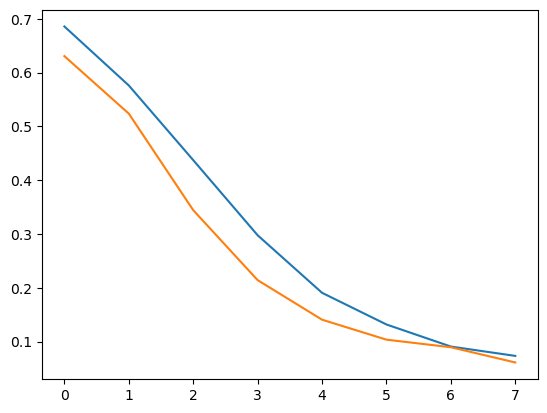

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Model 3

In [34]:
model3 = Sequential()
model3.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(4,4)))
model3.add(Conv2D(5, (3,3),padding='valid',activation='relu'))
# model3.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))
model3.add(Flatten())
#model3.add(Dense(128,activation='relu'))
#model3.add(Dense(64,activation='relu'))
model3.add(Dense(2,activation='softmax'))

In [35]:
from tensorflow.keras.losses import CategoricalCrossentropy
model3.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [36]:
history = model3.fit( 
  train_it,
  validation_data=val_it,
  epochs=6)

Epoch 1/6
14/14 [==============================] - 35s 3s/step - loss: 0.6120 - accuracy: 0.7685 - val_loss: 0.5164 - val_accuracy: 0.8958
Epoch 2/6
14/14 [==============================] - 34s 2s/step - loss: 0.4032 - accuracy: 0.9191 - val_loss: 0.2820 - val_accuracy: 0.9236
Epoch 3/6
14/14 [==============================] - 39s 3s/step - loss: 0.2220 - accuracy: 0.9399 - val_loss: 0.1437 - val_accuracy: 0.9583
Epoch 4/6
14/14 [==============================] - 33s 2s/step - loss: 0.1175 - accuracy: 0.9711 - val_loss: 0.0881 - val_accuracy: 0.9792
Epoch 5/6
14/14 [==============================] - 42s 3s/step - loss: 0.0856 - accuracy: 0.9733 - val_loss: 0.0649 - val_accuracy: 0.9844
Epoch 6/6
14/14 [==============================] - 33s 2s/step - loss: 0.0644 - accuracy: 0.9829 - val_loss: 0.0660 - val_accuracy: 0.9809


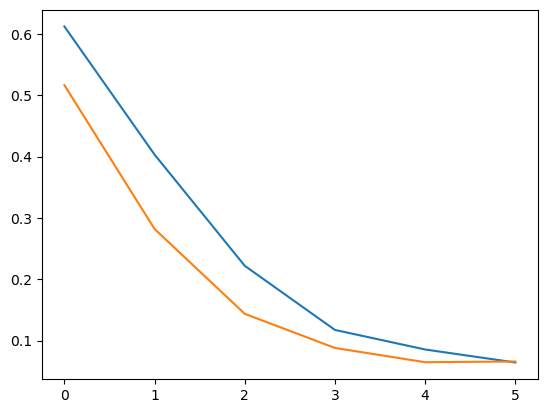

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Model 4

In [38]:
model4 = Sequential()
model4.add(Conv2D(12, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(10, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(4,4)))
model4.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model4.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model4.add(MaxPooling2D(pool_size=(3,3)))
model4.add(Flatten())
#model4.add(Dense(128,activation='relu'))
#model4.add(Dense(64,activation='relu'))
model4.add(Dense(2,activation='softmax'))

In [39]:
from tensorflow.keras.losses import CategoricalCrossentropy
model4.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [40]:
history = model4.fit( 
  train_it,
  validation_data=val_it,
  epochs=10)

Epoch 1/10
14/14 [==============================] - 39s 3s/step - loss: 0.6815 - accuracy: 0.6424 - val_loss: 0.6561 - val_accuracy: 0.8229
Epoch 2/10
14/14 [==============================] - 38s 3s/step - loss: 0.6071 - accuracy: 0.8546 - val_loss: 0.5161 - val_accuracy: 0.8681
Epoch 3/10
14/14 [==============================] - 33s 2s/step - loss: 0.4065 - accuracy: 0.8932 - val_loss: 0.2649 - val_accuracy: 0.9392
Epoch 4/10
14/14 [==============================] - 38s 3s/step - loss: 0.2065 - accuracy: 0.9362 - val_loss: 0.1413 - val_accuracy: 0.9566
Epoch 5/10
14/14 [==============================] - 36s 3s/step - loss: 0.1034 - accuracy: 0.9696 - val_loss: 0.0807 - val_accuracy: 0.9740
Epoch 6/10
14/14 [==============================] - 35s 3s/step - loss: 0.0677 - accuracy: 0.9815 - val_loss: 0.0503 - val_accuracy: 0.9896
Epoch 7/10
14/14 [==============================] - 33s 2s/step - loss: 0.0569 - accuracy: 0.9844 - val_loss: 0.0378 - val_accuracy: 0.9913
Epoch 8/10
14/14 [==

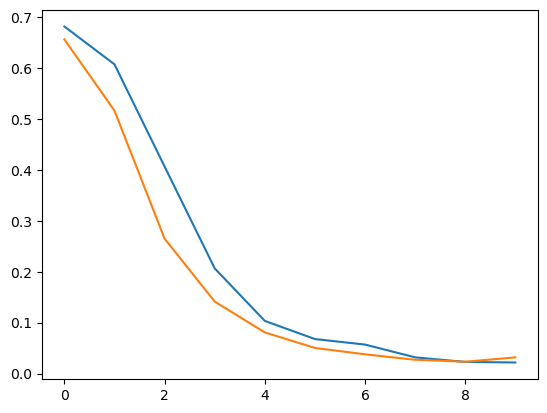

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Model 5

In [42]:
model5 = Sequential()
model5.add(Conv2D(15, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model5.add(MaxPooling2D(pool_size=(5,5)))
model5.add(Conv2D(12, (4,4),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(4,4)))
model5.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model5.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(3,3)))
model5.add(Flatten())
#model5.add(Dense(128,activation='relu'))
#model5.add(Dense(64,activation='relu'))
model5.add(Dense(2,activation='softmax'))

In [43]:
from tensorflow.keras.losses import CategoricalCrossentropy
model5.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [44]:
history = model5.fit( 
  train_it,
  validation_data=val_it,
  epochs=7)

Epoch 1/7
14/14 [==============================] - 37s 3s/step - loss: 0.6784 - accuracy: 0.5935 - val_loss: 0.6436 - val_accuracy: 0.6545
Epoch 2/7
14/14 [==============================] - 39s 3s/step - loss: 0.5999 - accuracy: 0.7448 - val_loss: 0.5417 - val_accuracy: 0.7535
Epoch 3/7
14/14 [==============================] - 41s 3s/step - loss: 0.4739 - accuracy: 0.8101 - val_loss: 0.4071 - val_accuracy: 0.8438
Epoch 4/7
14/14 [==============================] - 53s 4s/step - loss: 0.3527 - accuracy: 0.8450 - val_loss: 0.2815 - val_accuracy: 0.8993
Epoch 5/7
14/14 [==============================] - 39s 3s/step - loss: 0.2258 - accuracy: 0.9206 - val_loss: 0.2070 - val_accuracy: 0.9271
Epoch 6/7
14/14 [==============================] - 44s 3s/step - loss: 0.1428 - accuracy: 0.9562 - val_loss: 0.1255 - val_accuracy: 0.9566
Epoch 7/7
14/14 [==============================] - 36s 3s/step - loss: 0.1103 - accuracy: 0.9607 - val_loss: 0.0860 - val_accuracy: 0.9774


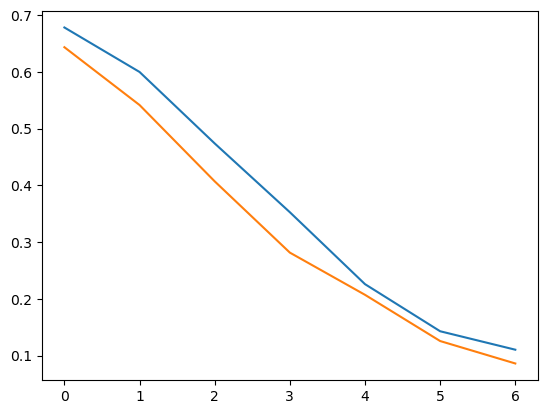

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [46]:
model2.save('model.h5')

In [47]:
from tensorflow import keras
model = keras.models.load_model('model.h5')

In [68]:
from keras_preprocessing.image import load_img
image = load_img('C:\\Users\\Harikishan\\Downloads\\data\\test\\infected\\img_0_993.jpg', target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
prediction = model.predict(img)

1/1 [==============================] - 0s 32ms/step


In [69]:
type(prediction)

numpy.ndarray

In [70]:
print(prediction)

[[0.99757737 0.00242261]]


In [71]:
l={"infected":prediction[0][0],"notinfected":prediction[0][1]}
def get_key(val):
    for key, value in l.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [72]:
j=prediction.max()
get_key(j)

'infected'